# Descriptive Analysis

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#Downloads/PyQuesters_Python_Hackathon/HUPA-UC Diabetes Dataset
path = "HUPA-UC Diabetes Dataset/"
demographic_path = path + "T1DM_patient_sleep_demographics_with_race.csv"
all_patients_path = path + "ALL_PATIENTS.csv"
modified_demographic_path = path+"DEMOGRAPHIC.csv"
patients_demographic_path = path +"PATIENTS_WITH_DEMOGRAPHIC.csv"
print(demographic_path)

HUPA-UC Diabetes Dataset/T1DM_patient_sleep_demographics_with_race.csv


***Q1: How many participants in the dataset have diabetes, and what is their percentage?***  
*Reasoning:*
*Since understanding the prevalence of diabetes is key to this analysis, examining the proportion of 
participants with the condition helps contextualize the population.*

In [16]:

# Load the merged patient and demographic dataset
df = pd.read_csv(patients_demographic_path)

# ---------------------------
# Step 1: Unique participants by gender
# ---------------------------
gender_counts = df.groupby('patient_id')['gender'].first().value_counts()
gender_percent = gender_counts / gender_counts.sum() * 100

print("Number of participants by gender:")
print(gender_counts)
print("\nPercentage of participants by gender:")
print(gender_percent.round(2))

# Gender comparison
if gender_counts.get('Female', 0) > gender_counts.get('Male', 0):
    print("\nFemale participants are higher in number.")
elif gender_counts.get('Male', 0) > gender_counts.get('Female', 0):
    print("\nMale participants are higher in number.")
else:
    print("\nNumber of male and female participants are equal.")

# ---------------------------
# Step 2: Identify diabetic participants
# ---------------------------
# Example threshold: max glucose >= 126 mg/dL considered diabetic
diabetic_patients = df.groupby('patient_id')['glucose'].max()
diabetic_patients = diabetic_patients[diabetic_patients >= 126]

print("\nNumber of diabetic participants:", len(diabetic_patients))
print("Percentage of total participants:", 
      round(len(diabetic_patients)/df['patient_id'].nunique()*100, 2))

# ---------------------------
# Step 3: Gender-wise distribution of diabetic participants
# ---------------------------
# Merge with gender information
gender_info = df[['patient_id', 'gender']].drop_duplicates()
diabetic_gender = gender_info[gender_info['patient_id'].isin(diabetic_patients.index)]
diabetic_gender_counts = diabetic_gender['gender'].value_counts()
diabetic_gender_percent = diabetic_gender_counts / diabetic_gender_counts.sum() * 100

print("\nDiabetic participants by gender:")
print(diabetic_gender_counts)
print("\nPercentage of diabetic participants by gender:")
print(diabetic_gender_percent.round(2))



Number of participants by gender:
gender
Male      16
Female     9
Name: count, dtype: int64

Percentage of participants by gender:
gender
Male      64.0
Female    36.0
Name: count, dtype: float64

Male participants are higher in number.

Number of diabetic participants: 25
Percentage of total participants: 100.0

Diabetic participants by gender:
gender
Male      16
Female     9
Name: count, dtype: int64

Percentage of diabetic participants by gender:
gender
Male      64.0
Female    36.0
Name: count, dtype: float64


***Q2: How does heart rate correlate with physical activity (steps) across patients?***    
*Reasoning: Understanding the relationship between heart rate and physical activity helps assess cardiovascular fitness and activity patterns in diabetes patients, which is crucial for comprehensive health monitoring.*

In [59]:
print("HEART RATE vs PHYSICAL ACTIVITY ANALYSIS")
print("=" * 50)

# Step 1: Load and examine the data
print(f"Total records in dataset: {len(df):,}")
print(f"Heart rate range: {df['heart_rate'].min():.0f} - {df['heart_rate'].max():.0f} bpm")
print(f"Steps range: {df['steps'].min():.0f} - {df['steps'].max():.0f} steps")

# Step 2: Filter out inactive periods (zero steps) and Create a subset with only active periods (steps > 0)
active_data = df[df['steps'] > 0].copy()
print(f"Records with activity (steps > 0): {len(active_data):,}")
print(f"Records with no activity (steps = 0): {len(df) - len(active_data):,}")
print(f"Percentage of time patients were active: {len(active_data)/len(df)*100:.1f}%")

# Step 3: Calculate the correlation between heart rate and steps
print("\nCalculating correlation between heart rate and steps")
correlation = active_data['heart_rate'].corr(active_data['steps'])

# Interpret the result
if correlation > 0.7:
    strength = "Strong positive"
elif correlation > 0.3:
    strength = "Moderate positive"
elif correlation > 0.1:
    strength = "Weak positive"
elif correlation > -0.1:
    strength = "Very weak"
elif correlation > -0.3:
    strength = "Weak negative"
else:
    strength = "Moderate to strong negative"

print(f"Result: {strength} correlation")

# Step 4: Compare heart rate during activity vs rest
print("\nComparing heart rate during activity vs rest")

hr_active = active_data['heart_rate'].mean()
hr_rest = df[df['steps'] == 0]['heart_rate'].mean()
hr_difference = hr_active - hr_rest

print(f" - Average heart rate during activity: {hr_active:.1f} bpm")
print(f" - Average heart rate during rest: {hr_rest:.1f} bpm")
print(f" - Heart rate increase during activity: {hr_difference:.1f} bpm")

if hr_difference > 20:
    print("Result: Significant heart rate response to activity (good cardiovascular response)")
elif hr_difference > 10:
    print("Result: Moderate heart rate response to activity")
else:
    print("Result: Minimal heart rate response to activity (may indicate fitness or medication effects)")


HEART RATE vs PHYSICAL ACTIVITY ANALYSIS
Total records in dataset: 309,392
Heart rate range: 32 - 196 bpm
Steps range: 0 - 842 steps
Records with activity (steps > 0): 90,042
Records with no activity (steps = 0): 219,350
Percentage of time patients were active: 29.1%

Calculating correlation between heart rate and steps
Result: Moderate positive correlation

Comparing heart rate during activity vs rest
 - Average heart rate during activity: 88.5 bpm
 - Average heart rate during rest: 72.2 bpm
 - Heart rate increase during activity: 16.3 bpm
Result: Moderate heart rate response to activity


***Q3: What is the distribution of calorie expenditure and how does it vary throughout the day?***    
*Reasoning: Calorie expenditure patterns reveal daily activity rhythms and metabolic patterns, helping understand energy balance in diabetes patients and optimize meal timing and insulin delivery.*



Distribution of Calorie Expenditure
------------------------------------------------------------
count    309392.00
mean          8.81
std           6.93
min           0.00
25%           5.85
50%           6.28
75%           9.19
max         106.35
Name: calories, dtype: float64


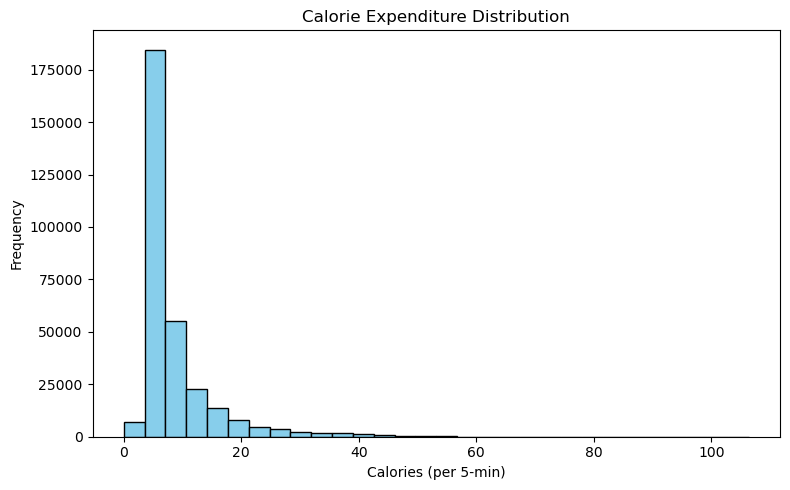

In [98]:
print("\n\nDistribution of Calorie Expenditure")
print("-" * 60)

# Ensure time column is datetime (optional if not needed for this)
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Basic stats
print(df['calories'].describe().round(2))

# Plot distribution
plt.figure(figsize=(8,5))
plt.hist(df['calories'], bins=30, color='skyblue', edgecolor='black')
plt.title('Calorie Expenditure Distribution')
plt.xlabel('Calories (per 5-min)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
